In [1]:
import os
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import pretrainedmodels
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cuda'

CUDA_VISIBLE_DEVICES=1

In [2]:
import json

ret_json = {}
#file_name = "test_images/123.dcm"

In [3]:
url = "https://www.researchgate.net/publication/51469608/figure/fig1/AS:339688444448772@1457999444671/Chest-X-ray-on-admission-showed-cardiomegaly-with-a-clear-lung.png"


In [4]:
from image_processing import im_process
im = im_process(url)

# Part 1

In [5]:
from modules.module1 import module1

In [6]:
model1_path = "models/1.pth"
ans1 = module1(model1_path).predict(im)

In [7]:

if (ans1[0] != 'X-Ray'): 
    ret_json['img_type'] = 'Not X-Ray'
    exit()
    
ret_json['img_type'] = 'X-Ray'

In [8]:
ret_json

{'img_type': 'X-Ray'}

# Part 2

In [9]:
from modules.module2 import module2

In [10]:
model2_path = "models/2.pth"
ans2 = module2(model2_path).predict(im)

In [11]:
 
ret_json['xray_type'] = ans2[0]
ret_json  


{'img_type': 'X-Ray', 'xray_type': 'Chest'}

# Part 3

In [12]:
from modules.module3.chest import chest

In [13]:
model3_path = "models/module3/chest.pth"
threshold = 0.5
res, model = chest(model3_path, threshold).predict(im)

In [14]:
res

[{'Cardiomegaly': 0.988366}]

In [15]:
ret_json['disease'] = res

In [16]:
ret_json

{'img_type': 'X-Ray',
 'xray_type': 'Chest',
 'disease': [{'Cardiomegaly': 0.988366}]}

# Part 4

In [17]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transformations = transforms.Compose([
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.Grayscale(3),
                    transforms.ToTensor(),
                    ])
                
torch_img = transformations(im)
normed_torch_img = transforms.Normalize(mean, std)(torch_img).unsqueeze(0)

In [18]:
from modules.gradcam_func import grad_cam

/home/kukarobotics/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2404: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


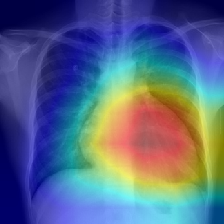

In [19]:
grad_cam(model= model, model_type ='densenet', layer_name='features_norm5', normed_torch_img=normed_torch_img, torch_img=torch_img)   #output image
    

In [20]:
from gradcam.utils import visualize_cam
from gradcam import GradCAM

In [21]:
config =  dict(model_type = 'densenet', arch = model, layer_name = 'features_norm5')
config['arch'].eval() #.to(device)

cam = GradCAM.from_config(**config)
mask, _ = cam(normed_torch_img)
heatmap, result = visualize_cam(mask, torch_img )

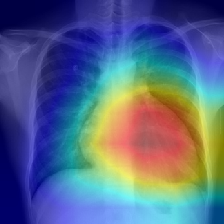

In [22]:
transforms.ToPILImage()(result)